<a href="https://colab.research.google.com/github/koukyo1994/iOS-note-v2/blob/master/src/py/colab/Colab-create-dataset-and-train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
%%sh
apt -qq -y update >> /dev/null
apt -qq -y install fonts-ipafont wamerican >> /dev/null
pip install tensorflow-gpu==2.0.0 imgaug==0.2.6 coremltools==3.1 >> /dev/null





ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.


In [2]:
!git clone https://github.com/koukyo1994/iOS-note-v2.git

Cloning into 'iOS-note-v2'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (295/295), done.
remote: Total 390 (delta 173), reused 292 (delta 88), pack-reused 0
Receiving objects: 100% (390/390), 11.84 MiB | 5.28 MiB/s, done.
Resolving deltas: 100% (173/173), done.


## Create Dataset

In [3]:
%cd /content/iOS-note-v2/src/py
!make create-dataset NSAMPLES=20000

/content/iOS-note-v2/src/py
chmod +x setup.sh
make font-setup
make[1]: Entering directory '/content/iOS-note-v2/src/py'
./setup.sh
alanis-hand
architext
ashcan-bb
./setup.sh: 7: [: ashcanbb_bold.ttf: unexpected operator
attack-of-the-cucumbers
./setup.sh: 7: [: attack: unexpected operator
attract-more-women
blzee
calligravity
domestic-manners
FH-GoodDogPlain-WTT
james-almacen
james-fajardo
./setup.sh: 7: [: James: unexpected operator
khand
ladylike-bb
mulders-handwriting
mumsies
Otto
pecita
quikhand
Sophia
two-turtle-doves
make[1]: Leaving directory '/content/iOS-note-v2/src/py'
python create_dataset.py --n_samples 20000
100% 20000/20000 [07:06<00:00, 46.93it/s]


## Save Dataset in Google Drive

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r data/images /content/gdrive/My\ Drive/AppliedML/
!cp data/labels.csv /content/gdrive/My\ Drive/AppliedML/

## Training

In [5]:
!python train.py --config config/resnet.3blocks.json

Epoch 1
Step 100 : Loss : 40.618763
Step 200 : Loss : 33.9976234
Step 300 : Loss : 31.689642
Step 400 : Loss : 30.3199215
Step 500 : Loss : 29.3653145
Step 591 : Loss :  28.7658043
Save weights at epoch: 0
Epoch 2
Step 600 : Loss : 28.7120247
Step 700 : Loss : 28.1345978
Step 800 : Loss : 27.6754227
Step 900 : Loss : 27.2524
Step 1000 : Loss : 26.6490974
Step 1100 : Loss : 25.8566704
Step 1182 : Loss :  25.1651459
Save weights at epoch: 1
Epoch 3
Step 1200 : Loss : 25.0190659
Step 1300 : Loss : 24.1555367
Step 1400 : Loss : 23.3307514
Step 1500 : Loss : 22.5495625
Step 1600 : Loss : 21.8071194
Step 1700 : Loss : 21.1254787
Step 1773 : Loss :  20.6503639
Save weights at epoch: 2
Epoch 4
Step 1800 : Loss : 20.4806881
Step 1900 : Loss : 19.8704777
Step 2000 : Loss : 19.3016319
Step 2100 : Loss : 18.7688503
Step 2200 : Loss : 18.2579975
Step 2300 : Loss : 17.7885113
Step 2364 : Loss :  17.4967175
Save weights at epoch: 3
Epoch 5
Step 2400 : Loss : 17.3357487
Step 2500 : Loss : 16.9049377
S

In [0]:
!cp bin/3blocks_model_weights.h5 /content/gdrive/My\ Drive/AppliedML/3blocks_model_weights.h5

In [7]:
!python conversion.py --config config/resnet.3blocks.json

2020-01-13 00:18:20.305086: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-13 00:18:20.347031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-01-13 00:18:20.347637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-01-13 00:18:20.347908: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-01-13 00:18:20.348981: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-01-13 00:18:20.357950: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0


In [8]:
import coremltools
import cv2
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mlmodel = coremltools.models.MLModel("bin/2blocks_coreml_weights.mlmodel")

In [0]:
labels = pd.read_csv("data/labels.csv")
labels.head()

,image_id,text,width,height
0,cfcd208495d565ef66e7dff9f98764da,hibernates,112,32
1,c4ca4238a0b923820dcc509a6f75849b,muscles,79,32
2,c81e728d9d4c2f636f067f89cc14862c,domination,109,32
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,sitars,59,32
4,a87ff679a2f3e71d9181a67b7542122c,fuzzes,64,32


In [0]:
labels.loc[0, "image_id"]

'cfcd208495d565ef66e7dff9f98764da'

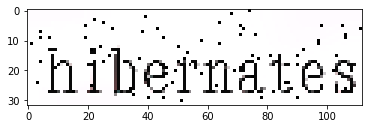

In [0]:
img = cv2.imread(f"data/images/{labels.loc[0, 'image_id']}.png")
plt.imshow(img)

In [0]:
pred = mlmodel.predict({"image": img})

Exception: ignored